In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# 문장의 길이 50, 임베딩 벡터의 차원 128
t = 50
d_model = 128
#sample_pos_encoding = PositionalEncoding(50, 128)

$\omega_k = \frac{1}{10000^{2k / d}}$

As it can be derived from the function definition, the frequencies are decreasing along the vector dimension. Thus it forms a *geometric progression* from  $2 \pi$ to  $10000 · 2\pi$ on the wavelengths.

In [3]:
def get_angles(position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

In [4]:
position=tf.range(t, dtype=tf.float32)[:, tf.newaxis]

In [5]:
position.shape

TensorShape([50, 1])

In [6]:
position[:, 0] # 길이만큼의 index

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49.],
      dtype=float32)>

In [7]:
i= tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]

In [8]:
i.shape

TensorShape([1, 128])

In [9]:
angle_rads = get_angles(
        position=tf.range(t, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

In [10]:
angle_rads[:, 0::2] # shape=(50, 64) 배열의 짝수 인덱스

<tf.Tensor: shape=(50, 64), dtype=float32, numpy=
array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 8.6596429e-01, 7.4989420e-01, ..., 1.5399265e-04,
        1.3335215e-04, 1.1547819e-04],
       [2.0000000e+00, 1.7319286e+00, 1.4997884e+00, ..., 3.0798529e-04,
        2.6670430e-04, 2.3095639e-04],
       ...,
       [4.7000000e+01, 4.0700321e+01, 3.5245026e+01, ..., 7.2376542e-03,
        6.2675509e-03, 5.4274751e-03],
       [4.8000000e+01, 4.1566284e+01, 3.5994923e+01, ..., 7.3916470e-03,
        6.4009032e-03, 5.5429535e-03],
       [4.9000000e+01, 4.2432251e+01, 3.6744816e+01, ..., 7.5456398e-03,
        6.5342556e-03, 5.6584314e-03]], dtype=float32)>

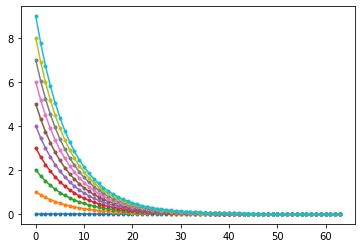

In [11]:
for pos in range(10):
    plt.plot(angle_rads[pos, 0::2], '.-')

In [12]:
angle_rads.shape

TensorShape([50, 128])

In [13]:
# 배열의 짝수 인덱스(2i)에는 사인 함수 적용
sines = tf.math.sin(angle_rads[:, 0::2])

# 배열의 홀수 인덱스(2i+1)에는 코사인 함수 적용
cosines = tf.math.cos(angle_rads[:, 1::2])

In [14]:
sines.shape

TensorShape([50, 64])

In [15]:
angle_rads = np.zeros(angle_rads.shape)
angle_rads[:, 0::2] = sines
angle_rads[:, 1::2] = cosines

In [16]:
pos_encoding = tf.constant(angle_rads)
print(pos_encoding.shape)
pos_encoding = pos_encoding[tf.newaxis, ...]
print(pos_encoding.shape) # Positional encoding is represented by a matrix

(50, 128)
(1, 50, 128)


In [17]:
pos_encoding = tf.cast(pos_encoding, tf.float32)

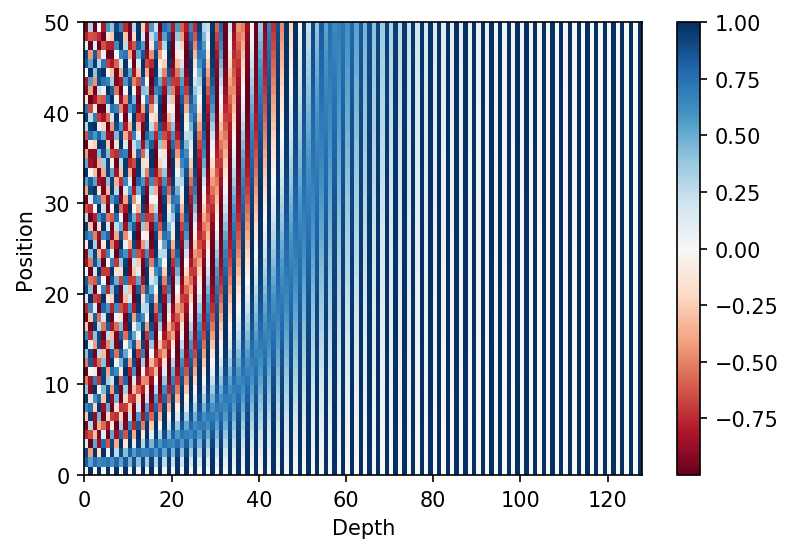

In [18]:
plt.figure(dpi=150)
plt.pcolormesh(pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 128))
plt.ylabel('Position')
plt.colorbar()
plt.show()

* Since our model contains no recurrence and no convolution, in order for the model to make use of the order of the sequence, we must inject some information about the relative or absolute position of the tokens in the sequence.
* Positional encoding is represented by a matrix. For sequence length T and model depth D, this would be a (T, D) tensor.
* A positional encoding is *a finite dimensional representation of the location* or “position” of items in a sequence.

* References

    * 트랜스포머(Transformer) https://wikidocs.net/31379
    * Transformer Architecture: The Positional Encoding https://kazemnejad.com/blog/transformer_architecture_positional_encoding/